In [47]:
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_colwidth', None)



# 1. Load tweets dataset

In [4]:
df = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='latin-1', names=['target', 'id', 'date', 'flag', 'user', 'text'])

In [5]:
df.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


# 2. Textual data quality analysis
## 2.1. Basic information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   id      1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [7]:
print(f"Values taken by the column flag: {df['flag'].unique()[0]}")

Values taken by the column flag: NO_QUERY


In [8]:
print(f"There are {df['user'].nunique()} different users.")

There are 659775 different users.


In [48]:
# Check for empty tweets
empty_tweets = len(df[df['text'].str.len() == 0])
print(f"\nNumber of empty tweets: {empty_tweets}")



Number of empty tweets: 0


## 2.2. Tweet length

In [9]:
df['tweet_length_chars'] = df['text'].str.len()
df['tweet_length_words'] = df['text'].str.split().apply(len)
df.head()

,target,id,date,flag,user,text,tweet_length_chars,tweet_length_words
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115,19
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,111,21
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,89,18
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,47,10
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",111,21



Tweet length statistics:
count    1.600000e+06
mean     7.409011e+01
std      3.644114e+01
min      6.000000e+00
25%      4.400000e+01
50%      6.900000e+01
75%      1.040000e+02
max      3.740000e+02
Name: tweet_length_chars, dtype: float64


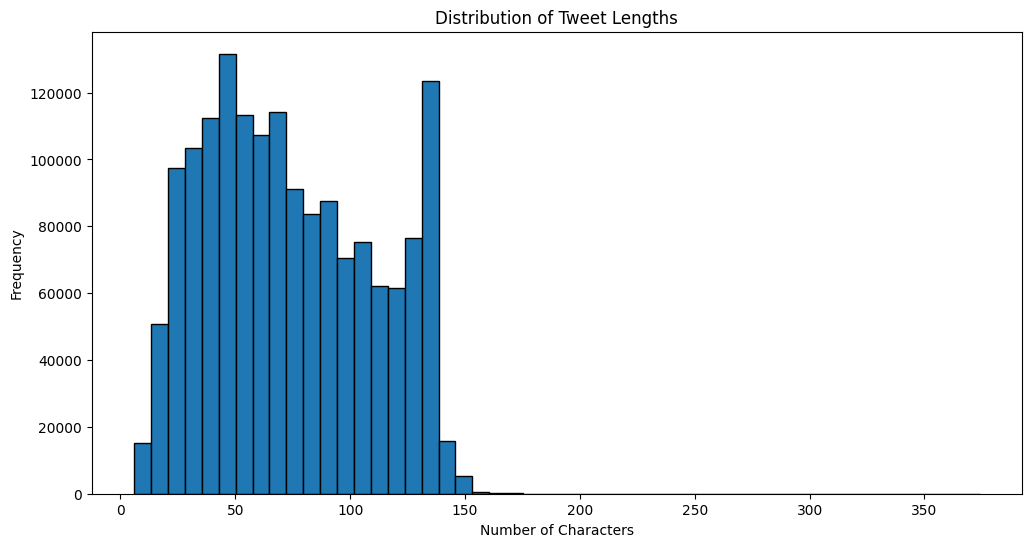


Most common tweet lengths (in words):
tweet_length_words
7     89283
8     88847
6     87307
9     87014
10    83542
Name: count, dtype: int64


In [16]:
# Tweet column analysis
print("\nTweet length statistics:")
print(df['tweet_length_chars'].describe())

# Plot distribution of tweet lengths
plt.figure(figsize=(12,6))
plt.hist(df['tweet_length_chars'], bins=50, edgecolor='black')
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()

# Most common tweet lengths in words
print("\nMost common tweet lengths (in words):")
print(df['tweet_length_words'].value_counts().head())

## 2.3. Tweet specificities (characters, URL, and mentions)

In [64]:
# Unique characters analysis
all_chars = ''.join(df['text'].values)
unique_chars = set(all_chars)
print(f"\nNumber of unique characters used: {len(unique_chars)}")
print(f"Unique characters used: {''.join(sorted(unique_chars))}")

# Check for repetitive characters (like 'aaaaaa' or '!!!!!!!')
repetitive_chars = df[df['text'].str.match(r'.*(.)\1{4,}.*')].shape[0]
print(f"\nTweets with repetitive characters: {repetitive_chars} ({(repetitive_chars/len(df)*100):.2f}%)")
print("\nExamples of tweets with repetitive characters:")
print(df[df['text'].str.match(r'.*(.)\1{4,}.*')]['text'].head(10))


# URL and mention analysis
tweets_with_urls = len(df[df['text'].str.contains('http|www', regex=True)])
tweets_with_mentions = len(df[df['text'].str.contains('@')])

# Print examples of tweets with URLs
print("\nExample tweets containing URLs:")
urls = df['text'].str.extract(r'\b(http|www\S+)', expand=False)
print(df[urls.notna()]['text'].head())

# Print examples of tweets with mentions
print("\nExample tweets containing @mentions:")
print(df[df['text'].str.contains('@')]['text'].head())

print(f"\nTweets containing URLs: {tweets_with_urls} ({tweets_with_urls/len(df)*100:.2f}%)")
print(f"Tweets containing @mentions: {tweets_with_mentions} ({tweets_with_mentions/len(df)*100:.2f}%)")



Number of unique characters used: 193
Unique characters used: 	 !#$%&'()*+,-./0123456789:;=?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]^_`abcdefghijklmnopqrstuvwxyz{|}~ ¡¢£¤¥¦§¨©ª«¬­®¯°±²³´µ¶·¸¹º»¼½¾¿ÂÃÄÅÆÇÈÉÊËÌÍÎÏÐÑÒÓ×ØÙÚÛßàáâãäåæçèéêëìíîï

Tweets with repetitive characters: 68145 (4.26%)

Examples of tweets with repetitive characters:
69                                                                                  @Lt_Algonquin agreed, I saw the failwhale allllll day today. 
73     Gym attire today was: Puma singlet, Adidas shorts.......and black business socks and leather shoes  Lucky did not run into any cute girls.
96                               so rylee,grace...wana go steve's party or not?? SADLY SINCE ITS EASTER I WNT B ABLE 2 DO MUCH  BUT OHH WELL.....
111                                                                                   I'm sooo sad!!! they killed off Kutner on House  whyyyyyyyy
130                        @chelserlynn haha its so cooooold 

### Comments
Tweets with repetitive characters often contain repeated dots or letters. For the latter, we can easily eliminate the repetition in the letters, helping the model better understand the words.

It will be useful to remove all the URL from the text to ease the detection of sentiment in the text.

Tweets containing only a mention in the text are tagged, allowing them to be removed from the dataset later, as they provide no relevant information for sentiment analysis.

In [56]:
# Create mention_only column
# Pattern matches tweets that only contain @ followed by word characters
df['mention_only'] = df['text'].str.match(r'^\s*@\w+\s*$').astype(int)

# Print summary
print(f"\nTweets that are only mentions: {df['mention_only'].sum()} ({df['mention_only'].sum()/len(df)*100:.2f}%)")
print("\nExample tweets that are only mentions:")
print(df[df['mention_only'] == 1]['text'].head())



Tweets that are only mentions: 2673 (0.17%)

Example tweets that are only mentions:
208         @mandayyy 
249       @mandayyy   
398     @danadearmond 
430         @anistorm 
1011    @citizensheep 
Name: text, dtype: object


## 2.4. Tweets with special characters and unreadable tweets

In [52]:
import string

special_chars = [c for c in unique_chars 
                if c not in string.ascii_letters 
                and c not in string.digits
                and c not in string.punctuation
                and not c.isalpha()
                and c not in ['¸', '·', ' ', '´', '»', '«']]  # Excludes accented letters, euro symbol, and specific characters
print('Special characters:', (sorted(special_chars)))

Special characters: ['\t', '\x7f', '\x80', '\x82', '\x83', '\x84', '\x85', '\x86', '\x87', '\x88', '\x89', '\x8a', '\x8b', '\x8c', '\x8e', '\x91', '\x92', '\x93', '\x94', '\x95', '\x96', '\x97', '\x98', '\x99', '\x9a', '\x9b', '\x9c', '\x9e', '\x9f', '\xa0', '¡', '¢', '£', '¤', '¥', '¦', '§', '¨', '©', '¬', '\xad', '®', '¯', '°', '±', '²', '³', '¶', '¹', '¼', '½', '¾', '¿', '×']


In [53]:
# Create unreadable column based on special character count
df['unreadable'] = df['text'].apply(lambda x: 1 if sum(1 for c in x if c in special_chars) > 5 else 0)

# Print summary statistics
print("\nTweets with more than 5 special characters:")
print("-" * 50)
print(f"\nNumber of unreadable tweets: {df['unreadable'].sum()}")
print("\nExample unreadable tweets:")
print(df[df['unreadable'] == 1][['text']].head(10))



Tweets with more than 5 special characters:
--------------------------------------------------

Number of unreadable tweets: 2010

Example unreadable tweets:
                                                                                                                                                        text
3318   http://tr.im/imOv ï¿½i, bï¿½c H?i Tho?i th? lï¿½ giï¿½ t? cu?c ??i r?i ( Mï¿½nh v?n cï¿½n nh? cï¿½i nhï¿½ t?p th? bï¿½ tï¿½ c?a bï¿½c ï¿½ ? ch? Tr?i 
3688                              @kijuto em ng? t? 1h sï¿½ng -&gt; 11h tr?a d?y ?n c?m, ?n xong ng? ti?p ??n t?n bï¿½y gi?  ! mï¿½ m?t.... mï¿½ m?t...... !
5055                                                                                                   Em ?ang lï¿½m gï¿½ nh? ? Sao ko th?y tr? l?i mï¿½nh  
5626                mai thi communication system mï¿½ ch?a cï¿½ h?c ???c ch? nï¿½o h?t, ch?c l?i f?i n?p gi?y tr?ng nh? hï¿½m thi mï¿½n Anten quï¿½,  :'&lt;
6916                                                    

In [32]:
# Show tweets containing special characters
print("\nTweets containing special characters:")
print("-" * 50)
for char in special_chars:
    tweets_with_char = df[df['text'].str.contains(char, regex=False)]
    if len(tweets_with_char) > 0:
        print(f"\nTweets containing '{char}':")
        print(tweets_with_char[['text']].head())



Tweets containing special characters:
--------------------------------------------------

Tweets containing '':
                                                                                                                                                                                                                                      text
245571                                                              ä»²æä¸èª²adverse possessionï¼?ä½ä¹å?çco-own, leasehold, license, proprietary estoppel å?ç¡ä¹å?°è±¡â¦ åâ¦ ç?å®å?ç?ï¼ç?å®å?ç?ï¼ç?å®å?ç?â¦ 
248973  Ð?ÑÑ, OpenOffice Ð²ÑÐ±ÐµÑ?Ð¸Ð» Ñ?Ð²Ð¾ÐµÐ¹ Ð½ÐµÑ?ÑÐ°Ð±Ð¸Ð»ÑÐ½Ð¾Ñ?ÑÑÑ Ð¿ÑÐ¸ ÑÐ°Ð±Ð¾ÑÐµ Ñ? ÑÐ°Ð±Ð»Ð¸ÑÐ°Ð¼Ð¸, Ð²ÑÐµÐ¼ÐµÐ½Ð½Ð¾ Ð¿ÐµÑÐµÐµÐ·Ð¶Ð°Ñ Ð¾Ð±ÑÐ°ÑÐ½Ð¾ Ð½Ð° M$. Ð§ÑÐ²Ñ?ÑÐ²ÑÑ Ñ?ÐµÐ±Ñ? Ð¿ÑÐµÐ´Ð°ÑÐµÐ»ÐµÐ¼ 
256818                                                                                                                                                                There are too m

In [55]:
# Check for tweets with high percentage of numbers
number_ratio = df['text'].str.count(r'[0-9]') / df['tweet_length_chars']
df['too_many_numbers'] = (number_ratio > 0.3).astype(int)
high_numbers = df['too_many_numbers'].sum()
print(f"\nTweets with high number ratio (>30%): {high_numbers} ({(high_numbers/len(df)*100):.2f}%)")
print("\nExamples of tweets with many numbers:")
print(df[df['too_many_numbers'] == 1]['text'].head(10))



Tweets with high number ratio (>30%): 176 (0.01%)

Examples of tweets with many numbers:
13232                                                                                    @ASOT400 
33162                                                                                     Ew 4/20 
39345                                                                                   @easy1126 
45054                                                                                   @Rove1974 
64138             todays been abit good :') i miss chrisx 98502398423094823094238423 though  &lt;3
78109                                                                                 is so 50/50 
83042                                                                                  work 12-16 
95463                                                                          13-02-09 = 50% day 
98359                                                                        work 0645-1915. Ugh. 
100125    oh crap i

### Comments
In this section, we reviewed tweets containing excessive special characters that render them unreadable, and created a column to tag these tweets so they can be removed from the dataset later.

## 2.5. Short tweets, repetitive characters, all caps tweets

In [ ]:
# Check for very short tweets that might be low quality
very_short_tweets = df[df['tweet_length_chars'] < 10].shape[0]
print(f"\nVery short tweets (<10 chars): {very_short_tweets} ({(very_short_tweets/len(df)*100):.2f}%)")
print("\nExamples of very short tweets:")
print(df[df['tweet_length_chars'] < 10]['text'].head(10))

# Check for all caps tweets (possible spam/low quality)
all_caps_tweets = df[df['text'].str.match(r'^[A-Z0-9\s\W]+$')].shape[0]
print(f"\nAll caps tweets: {all_caps_tweets} ({(all_caps_tweets/len(df)*100):.2f}%)")
print("\nExamples of all caps tweets:")
print(df[df['text'].str.match(r'^[A-Z0-9\s\W]+$')]['text'].head(10))


Text quality analysis:
--------------------------------------------------

Very short tweets (<10 chars): 3135 (0.20%)

Examples of very short tweets:
545      At work 
580      Evicted 
1189    headache 
1205    Up early 
1338      is cold
1343    is coldd 
2359    is tired 
2407     SO COLD 
2997    Homework 
3261     bad day 
Name: text, dtype: object

Tweets with repetitive characters: 68145 (4.26%)

Examples of tweets with repetitive characters:
69                                                                                  @Lt_Algonquin agreed, I saw the failwhale allllll day today. 
73     Gym attire today was: Puma singlet, Adidas shorts.......and black business socks and leather shoes  Lucky did not run into any cute girls.
96                               so rylee,grace...wana go steve's party or not?? SADLY SINCE ITS EASTER I WNT B ABLE 2 DO MUCH  BUT OHH WELL.....
111                                                                                   I'm sooo sad!!! they 

### Comments
As shown in the example above, very short tweets can still be used for sentiment analysis.

## 2.6. Average punctuation marks per tweet, word/character ratio


Average punctuation marks per tweet: 3.99
Tweets with excessive punctuation: 70057 (4.38%)

Tweets with suspicious character-to-word ratio: 57589 (3.60%)

Examples of tweets with suspicious character-to-word ratio:
58                                                               Ugh....92 degrees tomorrow 
95     Strider is a sick little puppy  http://apps.facebook.com/dogbook/profile/view/5248435
103                                                              watching &quot;House&quot; 
108                                                             @Henkuyinepu it's overrated 
135                                                                           Agh...snow!!! 
161                                                           is alone downstairs...working 
181                                  Check out my mug  http://www.erika-obscura.blogspot.com
208                                                                               @mandayyy 
249                                     

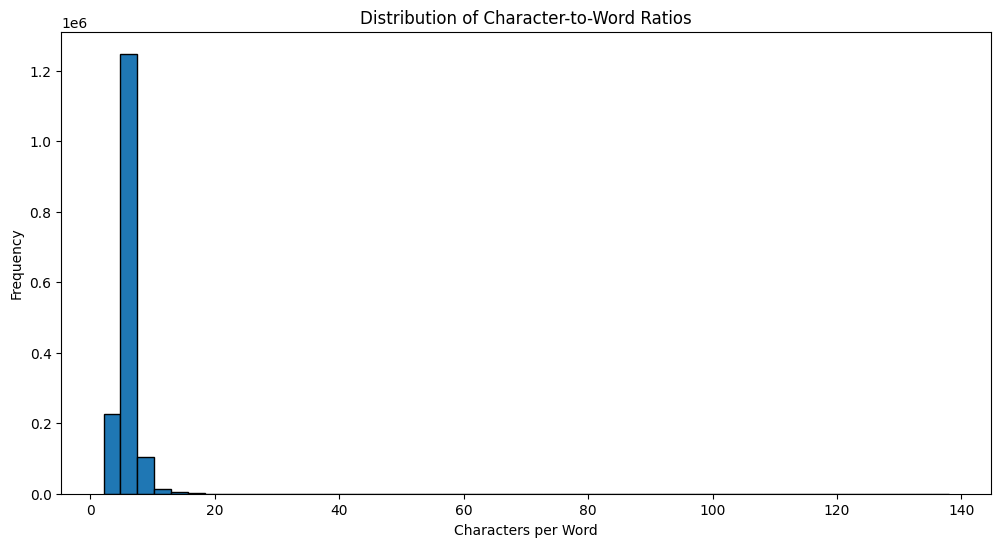

In [60]:
# Calculate average punctuation per tweet
punct_counts = df['text'].str.count(f'[{string.punctuation}]')
avg_punct = punct_counts.mean()
print(f"\nAverage punctuation marks per tweet: {avg_punct:.2f}")

# Check for tweets with excessive punctuation
excessive_punct = df[punct_counts > punct_counts.mean() + 2*punct_counts.std()].shape[0]
print(f"Tweets with excessive punctuation: {excessive_punct} ({(excessive_punct/len(df)*100):.2f}%)")

# Analyze word/character ratio (very low ratio might indicate spam or low quality)
char_word_ratio = df['tweet_length_chars'] / df['tweet_length_words']
suspicious_ratio = df[char_word_ratio > char_word_ratio.mean() + 2*char_word_ratio.std()].shape[0]
print(f"\nTweets with suspicious character-to-word ratio: {suspicious_ratio} ({(suspicious_ratio/len(df)*100):.2f}%)")
print("\nExamples of tweets with suspicious character-to-word ratio:")
print(df[char_word_ratio > char_word_ratio.mean() + 2*char_word_ratio.std()]['text'].head(10))

# Distribution of character-to-word ratios
plt.figure(figsize=(12, 6))
plt.hist(char_word_ratio, bins=50, edgecolor='black')
plt.title('Distribution of Character-to-Word Ratios')
plt.xlabel('Characters per Word')
plt.ylabel('Frequency')
plt.show()


### Comments
Tweets with excessive punctuations are often containing dots or a URL. Therefore, it is not necessary to remove them from the dataset. 

In [ ]:
# Replace &quot; with " in text column
df['text'] = df['text'].str.replace('&quot;', '"')


In [ ]:
# -------------------------------------------------------------------------------- NOTEBOOK-CELL: CODE_ASSISTANT_MAGIC_CELL
# %load_ext ai_code_assistant

# -------------------------------------------------------------------------------- NOTEBOOK-CELL: CODE
import dataiku
import pandas as pd, numpy as np
from dataiku import pandasutils as pdu
import os
import tempfile

# -------------------------------------------------------------------------------- NOTEBOOK-CELL: CODE
project = dataiku.api_client().get_default_project()
client = dataiku.api_client()

# -------------------------------------------------------------------------------- NOTEBOOK-CELL: CODE
# Retrieve Kaggle username and api key
auth_info = client.get_auth_info(with_secrets=True)
secret_value = None
for secret in auth_info["secrets"]:
    if secret["key"] == "KAGGLE_API_KEY":
        os.environ["KAGGLE_KEY"] = secret["value"]
        
    elif secret["key"] == "KAGGLE_USERNAME":
        os.environ["KAGGLE_USERNAME"] = secret["value"]
        
from kaggle import api # import the already authenticated API client

# -------------------------------------------------------------------------------- NOTEBOOK-CELL: CODE
# Retrieve the folder id where the dataset will be stored
folder_id = next((folder["id"] for folder in project.list_managed_folders() if folder["name"]=="data"), None)
if folder_id is None:
    print("Folder 'data' not found!")

# -------------------------------------------------------------------------------- NOTEBOOK-CELL: CODE
import chardet
folder = dataiku.Folder(folder_id)
dataset_slug = "kazanova/sentiment140"
with tempfile.TemporaryDirectory() as tmpdirname:
    
    api.dataset_download_files(dataset_slug, path=tmpdirname, unzip=True)

    for file in os.listdir(tmpdirname):
        local_file = os.path.join(tmpdirname, file)
        folder.upload_file(file, local_file)
        imported_tweets_df = pd.read_csv(local_file, encoding="latin-1", 
                                       names=['target', 'id', 'date', 'flag', 'user', 'text'])

# -------------------------------------------------------------------------------- NOTEBOOK-CELL: CODE
# Write recipe outputs
imported_tweets = dataiku.Dataset("imported_tweets")
imported_tweets.write_with_schema(imported_tweets_df)
